In [1]:
import pandas as pd


# Read the extracted features CSV file
extracted_features_df = pd.read_csv('/Users/havvadogan/Desktop/ML/extracted_features.csv')


In [34]:
column_titles = extracted_features_df.columns.tolist()
print(column_titles)

['Zero-Crossing Rate', 'Spectral Centroid', 'Spectral Rolloff', 'Spectral Contrast 0', 'Spectral Contrast 1', 'Spectral Contrast 2', 'Spectral Contrast 3', 'Spectral Contrast 4', 'Spectral Contrast 5', 'Spectral Contrast 6', 'MFCC 0', 'MFCC 1', 'MFCC 2', 'MFCC 3', 'MFCC 4', 'MFCC 5', 'MFCC 6', 'MFCC 7', 'MFCC 8', 'MFCC 9', 'MFCC 10', 'MFCC 11', 'MFCC 12', 'Chroma 0', 'Chroma 1', 'Chroma 2', 'Chroma 3', 'Chroma 4', 'Chroma 5', 'Chroma 6', 'Chroma 7', 'Chroma 8', 'Chroma 9', 'Chroma 10', 'Chroma 11', 'class']


In [30]:
extracted_features_df.head()

,Zero-Crossing Rate,Spectral Centroid,Spectral Rolloff,Spectral Contrast 0,Spectral Contrast 1,Spectral Contrast 2,Spectral Contrast 3,Spectral Contrast 4,Spectral Contrast 5,Spectral Contrast 6,...,Chroma 3,Chroma 4,Chroma 5,Chroma 6,Chroma 7,Chroma 8,Chroma 9,Chroma 10,Chroma 11,class
0,0.065848,-0.007356,-0.596073,0.098143,-0.821377,1.814057,0.151684,0.774200,0.446983,0.042605,...,-1.974514,-1.767081,-1.893341,-1.386341,1.335626,2.043950,-0.930806,-1.307249,-0.458414,dog_bark
1,0.219328,0.067202,0.029683,-1.010647,-0.684977,-0.113419,-0.173504,0.234841,0.759197,0.743262,...,0.353474,0.456656,0.403395,-0.092359,-0.077499,0.216506,0.317506,-0.096914,-0.146266,children_playing
2,-0.185368,-0.241589,-0.137154,-1.083911,-0.744169,-0.271152,-0.037948,-0.094399,0.574840,0.474627,...,-0.098027,0.487163,0.876417,0.474177,0.084612,-0.216001,0.057127,0.328336,0.200852,children_playing
3,0.111738,0.169106,0.250302,-1.043525,-0.436123,0.915046,-0.076141,-0.052425,0.889728,0.397306,...,0.194769,-0.105288,-0.585435,-0.756575,-0.489770,-0.393652,-0.276820,-0.243800,-0.144186,children_playing
4,-0.007080,-0.067517,0.003720,-0.991130,-0.511474,-0.332395,-0.227399,-0.046713,0.551894,0.439464,...,-0.034785,-0.003359,-0.084950,-0.080951,0.149053,-0.194303,-0.240589,0.127744,0.991889,children_playing


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


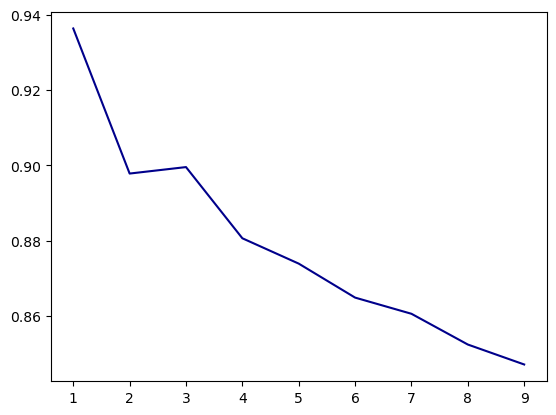

0.023857700824737548 mins
1 0.9362920544022906


In [21]:
# using KNN to classify

import time

from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score


# Finding the best value of k by using the method of cross-validation

s = time.time()
max_score = 0
max_i = -1
x = []
y = []

for i in range(1, 10, 1):

    clf = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf, X_train, y_train)
   

    if (score.mean() > max_score):
        max_score = score.mean()
        max_i = i

    x.append(i)
    y.append(score.mean())

plt.plot(x, y, color = "darkblue")
plt.show()

e = time.time()


print((e-s)/60 , "mins")

print(max_i, max_score)

In [3]:
# 1. Handling Missing Values (if applicable)
extracted_features_df.dropna(inplace=True)

In [4]:
# 2. Feature Scaling
scaler = StandardScaler()
# Select the features for scaling (excluding the class column)
features = extracted_features_df.drop('class', axis=1)
# Scale the selected features
scaled_features = scaler.fit_transform(features)
# Replace the original feature columns with the scaled features
extracted_features_df[features.columns] = scaled_features

In [47]:
# 5. Train-Test Split
from sklearn.preprocessing import LabelEncoder
X = extracted_features_df.drop('class', axis=1)
y = extracted_features_df['class']
le = LabelEncoder()
y = le.fit_transform(extracted_features_df["class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Create a KNN classifier with a chosen number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=3)



In [27]:
# Fit the model on the training data
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [28]:
# Predict the class labels for the test data
y_pred = knn.predict(X_test)



In [29]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9147109330280481


In [49]:
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import confusion_matrix, classification_report


In [51]:
xgb_clf  = XGBClassifier()

s = time.time()
xgb_clf.fit(X_train, y_train)
e = time.time()

print((e-s)/60 , " mins")

0.0786946694056193  mins


In [61]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score

In [62]:
y_pred_train_xgb = xgb_clf.predict(X_train)

print("Train score :- ",xgb_clf.score(X_train, y_train))
print("F1 score on trianing data :- ",f1_score(y_train, y_pred_train_xgb, average="macro"))

Train score :-  1.0
F1 score on trianing data :-  1.0


In [63]:
y_pred_xgb = xgb_clf.predict(X_test)

In [64]:
xgb_clf.score(X_test, y_test)

0.9250143102461362

In [65]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       203
           1       0.95      0.86      0.90        86
           2       0.87      0.93      0.90       183
           3       0.91      0.89      0.90       201
           4       0.94      0.91      0.92       206
           5       0.95      0.99      0.97       193
           6       0.97      0.92      0.94        72
           7       0.95      0.95      0.95       208
           8       0.93      0.96      0.94       165
           9       0.88      0.88      0.88       230

    accuracy                           0.93      1747
   macro avg       0.93      0.92      0.93      1747
weighted avg       0.93      0.93      0.92      1747

